#**Overview**

This script allows users to upload an image, processes the image to enhance text detection, identifies text regions using Tesseract OCR, highlights these regions with bounding boxes, and finally extracts and displays the detected text. It's a practical example of integrating computer vision and OCR techniques to automate text recognition from images.

#**Installing and Importing Necessary Libraries**

Installs the Tesseract OCR engine and the Python wrapper (pytesseract) in the Colab environment.

**cv2:** OpenCV for image processing (reading, modifying, displaying).

**numpy:** Supports array operations on images.

**pytesseract:** Python wrapper for Tesseract OCR, used for text recognition.

**cv2_imshow:** Displays images in Colab.

**files:** Allows uploading of files in Colab.

**os:** Used to manage file paths.

In [2]:
!apt-get install -y tesseract-ocr  # Install Tesseract OCR engine
!pip install pytesseract  # Install pytesseract (Python wrapper for Tesseract)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (4,251 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123629 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [3]:
import cv2          # For image processing
import numpy as np   # Used for numerical operations on image arrays
import pytesseract   # For Optical Character Recognition (OCR)
from google.colab.patches import cv2_imshow  # To display images in Colab
from google.colab import files  # To handle file uploads in Colab
import os           # For file path operations

# from google.colab import drive
# drive.mount('/content/drive') # Connect to the Drive

#**Defining Helper Functions**

##**Preprocessing the Image**

Converts the image to grayscale, denoises it, and applies binary thresholding for easier text detection.

In [ ]:
def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    denoised = cv2.fastNlMeansDenoising(gray)       # Remove noise
    thresh = cv2.threshold(denoised, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]  # Binary thresholding
    return thresh

##**Detecting Text Regions**

Detects text regions in the image and returns information like position, confidence, and text content in a dictionary.

In [ ]:
def detect_text_regions(image):
    # Detecting words
    boxes = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT)  # Get text region data
    return boxes

##**Drawing Bounding Boxes**

Draws bounding boxes around text regions with confidence scores above 60%.

In [ ]:
def draw_bounding_boxes(image, boxes):
    output = image.copy()  # Copy original image to draw boxes
    n_boxes = len(boxes['level'])  # Total number of detected text regions
    for i in range(n_boxes):
        if int(boxes['conf'][i]) > 60:  # Only consider boxes with confidence > 60%
            (x, y, w, h) = (boxes['left'][i], boxes['top'][i], boxes['width'][i], boxes['height'][i])  # Box coordinates
            cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw rectangle on the image
    return output


##**Extracting Detected Text**

Extracts and combines the detected text into a single string.

In [ ]:
def get_detected_text(boxes):
    detected_text = []
    n_boxes = len(boxes['level'])  # Total number of detected boxes
    for i in range(n_boxes):
        if int(boxes['conf'][i]) > 60:  # Only extract text with confidence > 60%
            detected_text.append(boxes['text'][i])  # Append detected text
    return ' '.join(detected_text)  # Combine text into a single string


#**Uploading and Reading the Image**

Prompts the user to upload an image, retrieves the file, and reads it using OpenCV.

In [4]:
image_path = "/content/demo.png"

image = cv2.imread(image_path)  # Read the image

#**Processing and Displaying Results**

Displays the original image, preprocesses it, detects text regions, draws bounding boxes, and prints the extracted text.



Original Image:


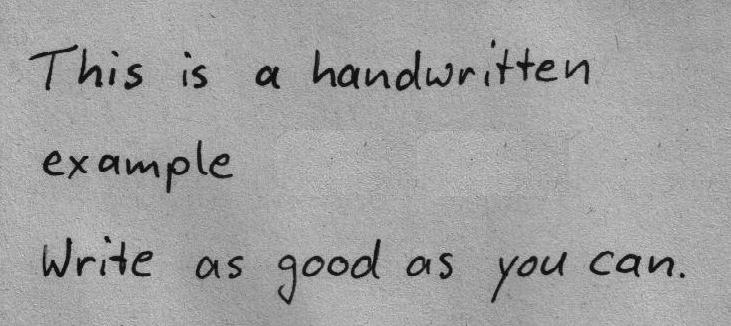


Image with Text Detection Regions:


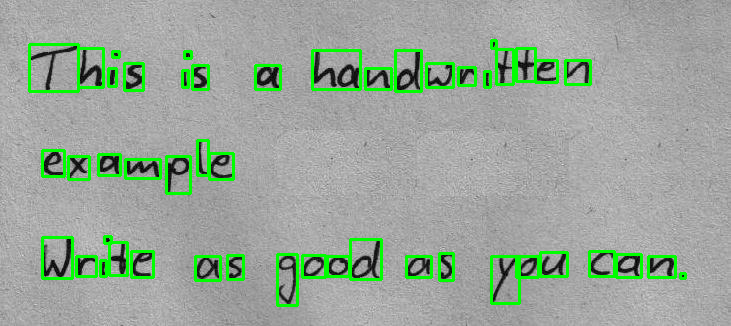

In [7]:
import cv2
import pytesseract
from google.colab.patches import cv2_imshow  # For displaying images in Colab

# Define helper functions
def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    _, binary = cv2.threshold(blurred, 128, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    return binary

def detect_text_regions(preprocessed):
    contours, _ = cv2.findContours(preprocessed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    boxes = [cv2.boundingRect(cnt) for cnt in contours]
    return boxes

def draw_bounding_boxes(image, boxes):
    for (x, y, w, h) in boxes:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    return image

def get_detected_text(boxes):
    text = []
    for (x, y, w, h) in boxes:
        roi = image[y:y+h, x:x+w]
        text.append(pytesseract.image_to_string(roi, config='--psm 6'))
    return '\n'.join(text)

# Load and process the image
image_path = "/content/demo.png"
image = cv2.imread(image_path)

if image is None:
    print(f"Error: Unable to read the image file: {image_path}")
else:
    print("\nOriginal Image:")
    cv2_imshow(image)

    preprocessed = preprocess_image(image)
    boxes = detect_text_regions(preprocessed)

    image_with_boxes = draw_bounding_boxes(image, boxes)
    print("\nImage with Text Detection Regions:")
    cv2_imshow(image_with_boxes)

    detected_text = get_detected_text(boxes)

